In \[ \]:

     

In \[147\]:

    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns 
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import make_column_transformer
    from sklearn.pipeline import Pipeline
    from math import sqrt
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    from sklearn.svm import SVR
    from catboost import CatBoostRegressor

In \[7\]:

    cdata = pd.read_csv("C:\\Users\\Asus\\python 3\\DSML ENTRI ELEVATE\\CarPrice_Assignment.csv")

In \[8\]:

    cdata.head()

Out\[8\]:

|     | car_ID | symboling | CarName                  | fueltype | aspiration | doornumber | carbody     | drivewheel | enginelocation | wheelbase | ... | enginesize | fuelsystem | boreratio | stroke | compressionratio | horsepower | peakrpm | citympg | highwaympg | price   |
|-----|--------|-----------|--------------------------|----------|------------|------------|-------------|------------|----------------|-----------|-----|------------|------------|-----------|--------|------------------|------------|---------|---------|------------|---------|
| 0   | 1      | 3         | alfa-romero giulia       | gas      | std        | two        | convertible | rwd        | front          | 88.6      | ... | 130        | mpfi       | 3.47      | 2.68   | 9.0              | 111        | 5000    | 21      | 27         | 13495.0 |
| 1   | 2      | 3         | alfa-romero stelvio      | gas      | std        | two        | convertible | rwd        | front          | 88.6      | ... | 130        | mpfi       | 3.47      | 2.68   | 9.0              | 111        | 5000    | 21      | 27         | 16500.0 |
| 2   | 3      | 1         | alfa-romero Quadrifoglio | gas      | std        | two        | hatchback   | rwd        | front          | 94.5      | ... | 152        | mpfi       | 2.68      | 3.47   | 9.0              | 154        | 5000    | 19      | 26         | 16500.0 |
| 3   | 4      | 2         | audi 100 ls              | gas      | std        | four       | sedan       | fwd        | front          | 99.8      | ... | 109        | mpfi       | 3.19      | 3.40   | 10.0             | 102        | 5500    | 24      | 30         | 13950.0 |
| 4   | 5      | 2         | audi 100ls               | gas      | std        | four       | sedan       | 4wd        | front          | 99.4      | ... | 136        | mpfi       | 3.19      | 3.40   | 8.0              | 115        | 5500    | 18      | 22         | 17450.0 |

5 rows × 26 columns

### Data Preprocessing<a href="#Data-Preprocessing" class="anchor-link">¶</a>

In \[5\]:

    car.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 205 entries, 0 to 204
    Data columns (total 26 columns):
     #   Column            Non-Null Count  Dtype  
    ---  ------            --------------  -----  
     0   car_ID            205 non-null    int64  
     1   symboling         205 non-null    int64  
     2   CarName           205 non-null    object 
     3   fueltype          205 non-null    object 
     4   aspiration        205 non-null    object 
     5   doornumber        205 non-null    object 
     6   carbody           205 non-null    object 
     7   drivewheel        205 non-null    object 
     8   enginelocation    205 non-null    object 
     9   wheelbase         205 non-null    float64
     10  carlength         205 non-null    float64
     11  carwidth          205 non-null    float64
     12  carheight         205 non-null    float64
     13  curbweight        205 non-null    int64  
     14  enginetype        205 non-null    object 
     15  cylindernumber    205 non-null    object 
     16  enginesize        205 non-null    int64  
     17  fuelsystem        205 non-null    object 
     18  boreratio         205 non-null    float64
     19  stroke            205 non-null    float64
     20  compressionratio  205 non-null    float64
     21  horsepower        205 non-null    int64  
     22  peakrpm           205 non-null    int64  
     23  citympg           205 non-null    int64  
     24  highwaympg        205 non-null    int64  
     25  price             205 non-null    float64
    dtypes: float64(8), int64(8), object(10)
    memory usage: 41.8+ KB

In \[42\]:

    car['price'] = car['price'].astype(int)

In \[6\]:

    car.shape

Out\[6\]:

    (205, 26)

In \[7\]:

    car.columns

Out\[7\]:

    Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
           'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
           'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
           'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
           'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
           'price'],
          dtype='object')

In \[8\]:

    car.duplicated().sum()

Out\[8\]:

    0

In \[9\]:

    car.isnull().sum()

Out\[9\]:

    car_ID              0
    symboling           0
    CarName             0
    fueltype            0
    aspiration          0
    doornumber          0
    carbody             0
    drivewheel          0
    enginelocation      0
    wheelbase           0
    carlength           0
    carwidth            0
    carheight           0
    curbweight          0
    enginetype          0
    cylindernumber      0
    enginesize          0
    fuelsystem          0
    boreratio           0
    stroke              0
    compressionratio    0
    horsepower          0
    peakrpm             0
    citympg             0
    highwaympg          0
    price               0
    dtype: int64

In \[9\]:

    cdata.drop('car_ID', axis = 1,inplace=True)

In \[11\]:

    cdata['cylindernumber'] = cdata['cylindernumber'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})

In \[46\]:

    cdata['CarName'] = cdata['CarName'].replace({'audi 100ls':'audi 100 ls'})

In \[13\]:

    cdata['doornumber'] = cdata['doornumber'].replace({'two':2, 'four':4})

In \[14\]:

    corr = cdata.select_dtypes(include=[np.number]).corr()

In \[48\]:

    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(corr, annot = True)

Out\[48\]:

    <Axes: >

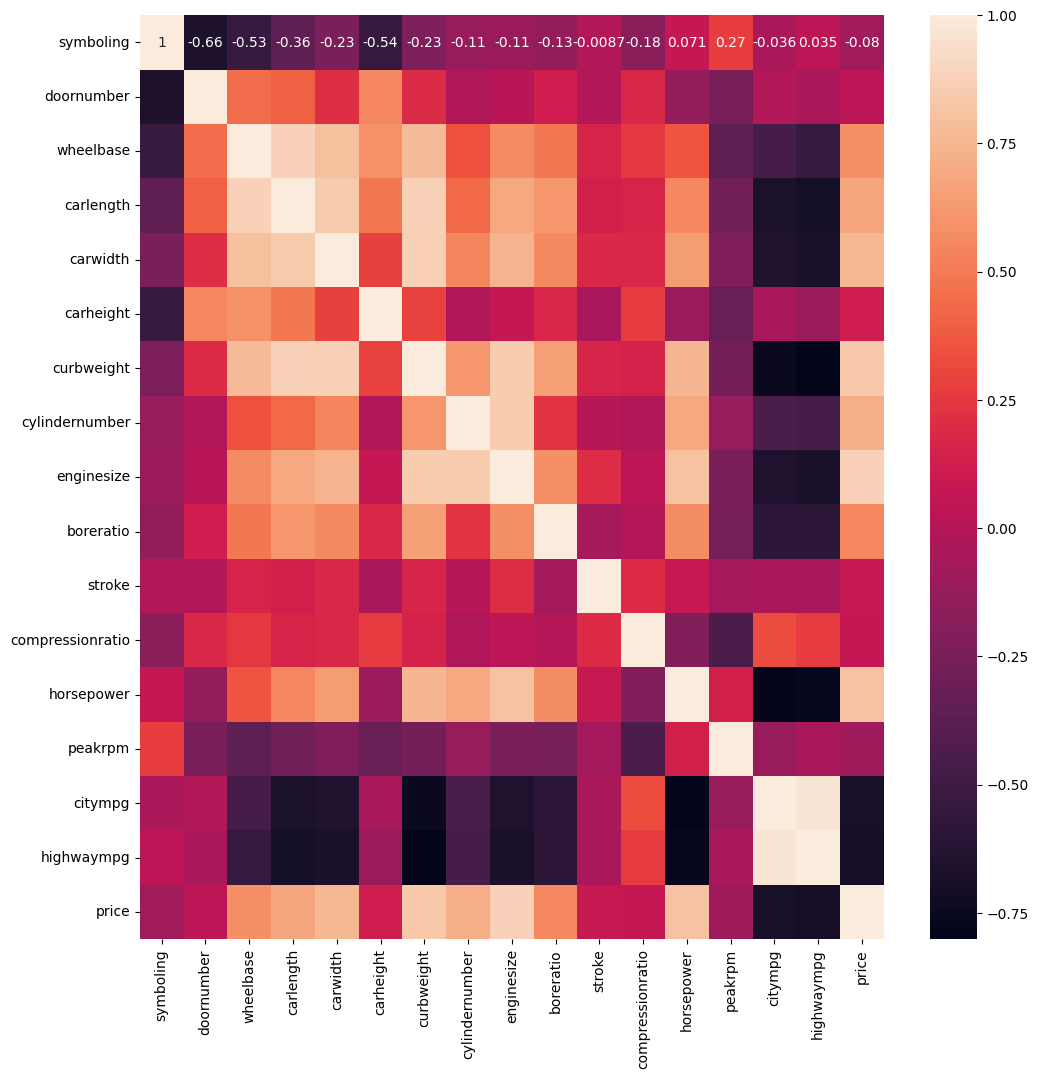

In \[20\]:

    cdata.columns

Out\[20\]:

    Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
           'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
           'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
           'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
           'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
          dtype='object')

In \[22\]:

    numerical_columns = cdata.select_dtypes(include=['number']).columns
    number_colu = cdata[numerical_columns]
    number_colu

Out\[22\]:

|     | symboling | doornumber | wheelbase | carlength | carwidth | carheight | curbweight | cylindernumber | enginesize | boreratio | stroke | compressionratio | horsepower | peakrpm | citympg | highwaympg | price   |
|-----|-----------|------------|-----------|-----------|----------|-----------|------------|----------------|------------|-----------|--------|------------------|------------|---------|---------|------------|---------|
| 0   | 3         | 2          | 88.6      | 168.8     | 64.1     | 48.8      | 2548       | 4              | 130        | 3.47      | 2.68   | 9.0              | 111        | 5000    | 21      | 27         | 13495.0 |
| 1   | 3         | 2          | 88.6      | 168.8     | 64.1     | 48.8      | 2548       | 4              | 130        | 3.47      | 2.68   | 9.0              | 111        | 5000    | 21      | 27         | 16500.0 |
| 2   | 1         | 2          | 94.5      | 171.2     | 65.5     | 52.4      | 2823       | 6              | 152        | 2.68      | 3.47   | 9.0              | 154        | 5000    | 19      | 26         | 16500.0 |
| 3   | 2         | 4          | 99.8      | 176.6     | 66.2     | 54.3      | 2337       | 4              | 109        | 3.19      | 3.40   | 10.0             | 102        | 5500    | 24      | 30         | 13950.0 |
| 4   | 2         | 4          | 99.4      | 176.6     | 66.4     | 54.3      | 2824       | 5              | 136        | 3.19      | 3.40   | 8.0              | 115        | 5500    | 18      | 22         | 17450.0 |
| ... | ...       | ...        | ...       | ...       | ...      | ...       | ...        | ...            | ...        | ...       | ...    | ...              | ...        | ...     | ...     | ...        | ...     |
| 200 | -1        | 4          | 109.1     | 188.8     | 68.9     | 55.5      | 2952       | 4              | 141        | 3.78      | 3.15   | 9.5              | 114        | 5400    | 23      | 28         | 16845.0 |
| 201 | -1        | 4          | 109.1     | 188.8     | 68.8     | 55.5      | 3049       | 4              | 141        | 3.78      | 3.15   | 8.7              | 160        | 5300    | 19      | 25         | 19045.0 |
| 202 | -1        | 4          | 109.1     | 188.8     | 68.9     | 55.5      | 3012       | 6              | 173        | 3.58      | 2.87   | 8.8              | 134        | 5500    | 18      | 23         | 21485.0 |
| 203 | -1        | 4          | 109.1     | 188.8     | 68.9     | 55.5      | 3217       | 6              | 145        | 3.01      | 3.40   | 23.0             | 106        | 4800    | 26      | 27         | 22470.0 |
| 204 | -1        | 4          | 109.1     | 188.8     | 68.9     | 55.5      | 3062       | 4              | 141        | 3.78      | 3.15   | 9.5              | 114        | 5400    | 19      | 25         | 22625.0 |

205 rows × 17 columns

In \[ \]:

     

In \[33\]:

    for i in number_colu:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=i, y='price', data=cdata, color='blue', marker='o', s=50, alpha=0.7)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.xlabel(i)
        plt.ylabel('Price')
        plt.show()

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

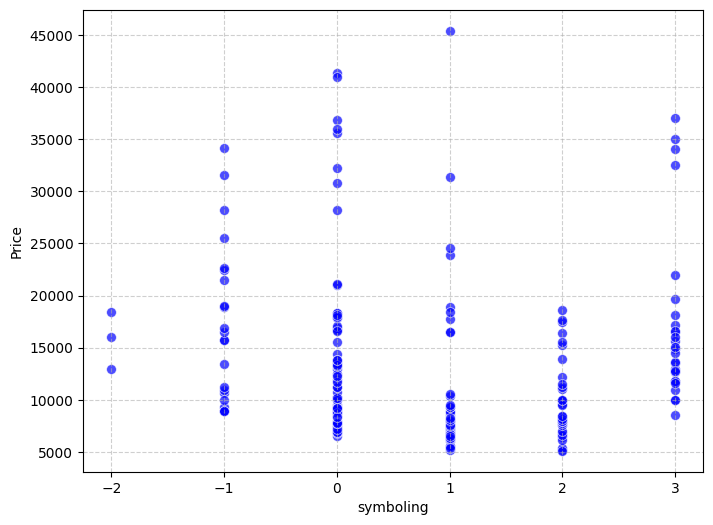

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

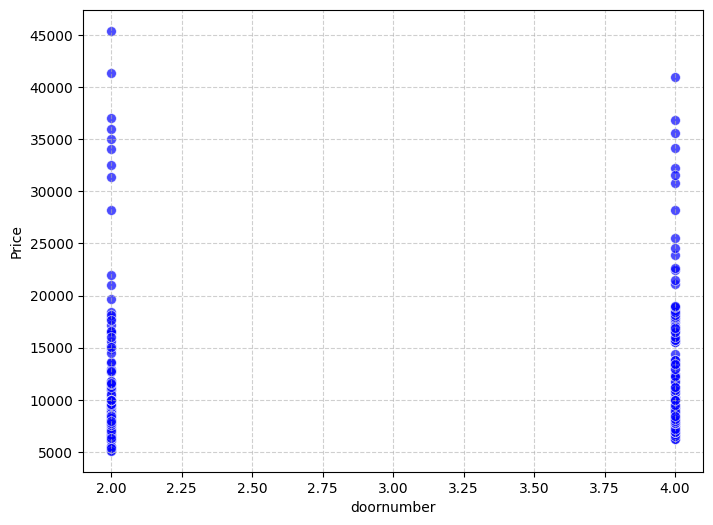

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

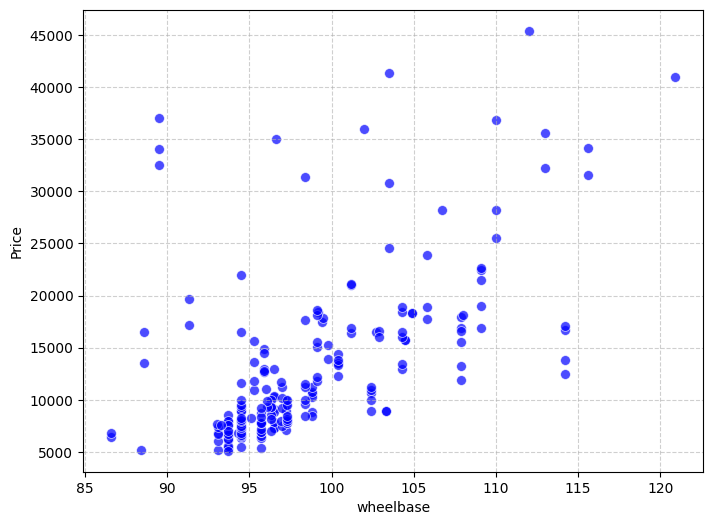

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

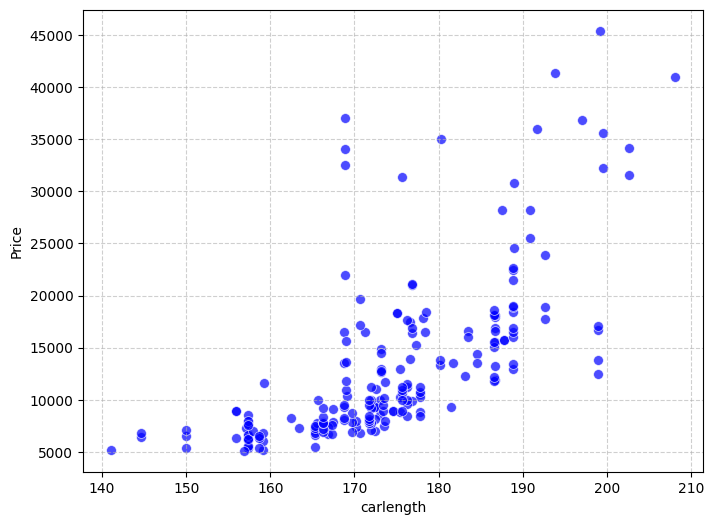

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

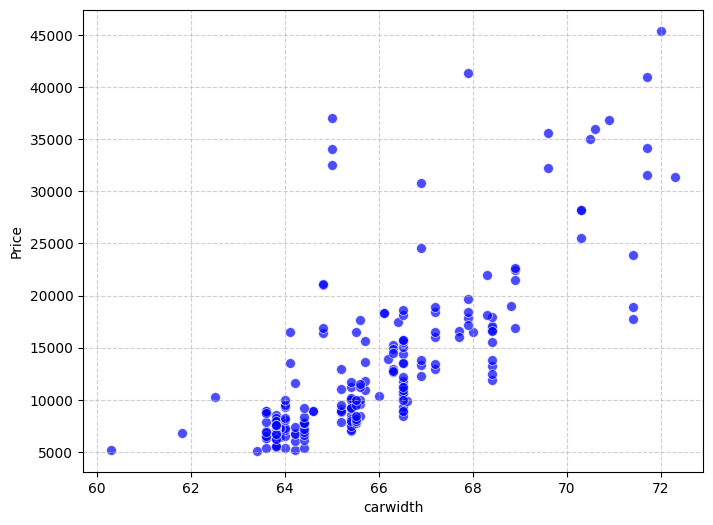

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

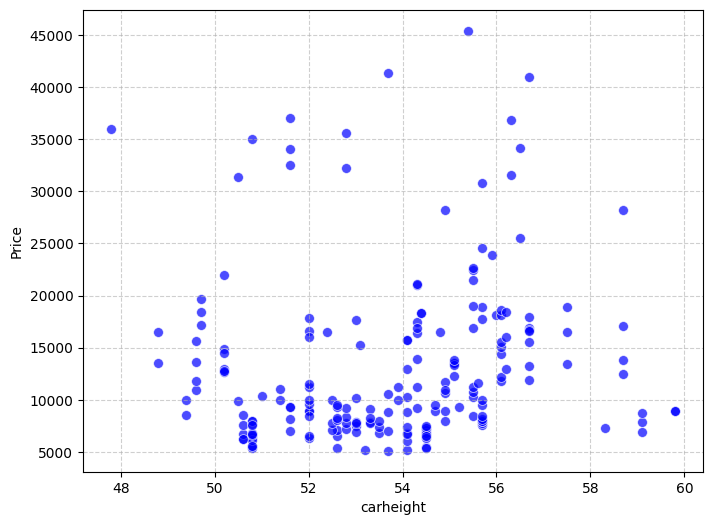

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

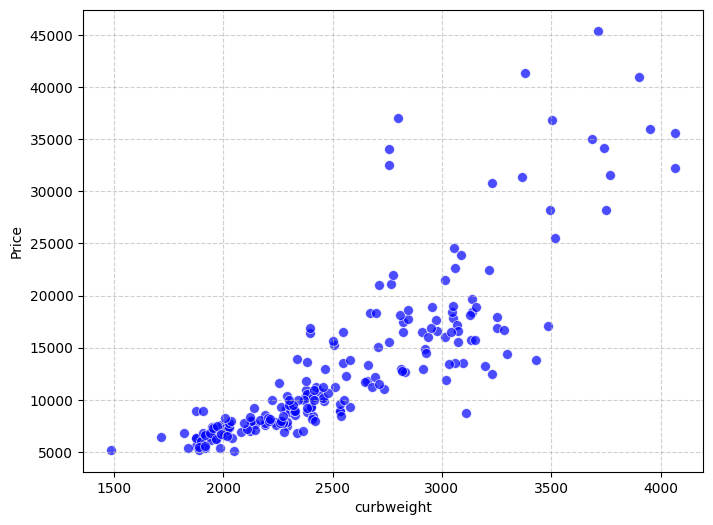

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

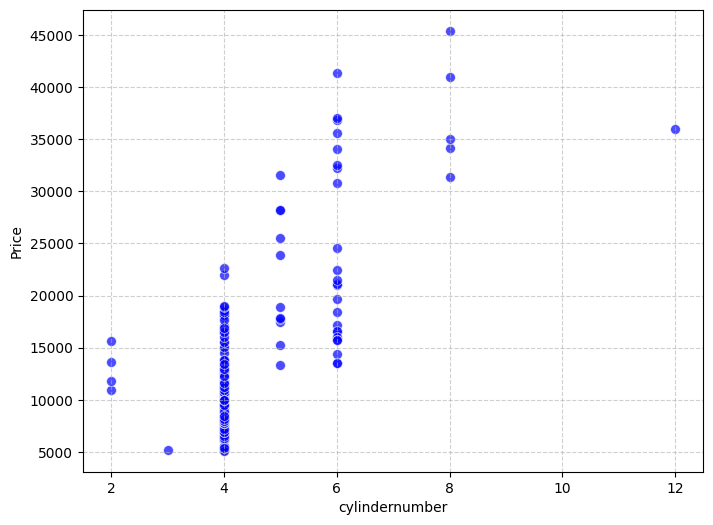

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

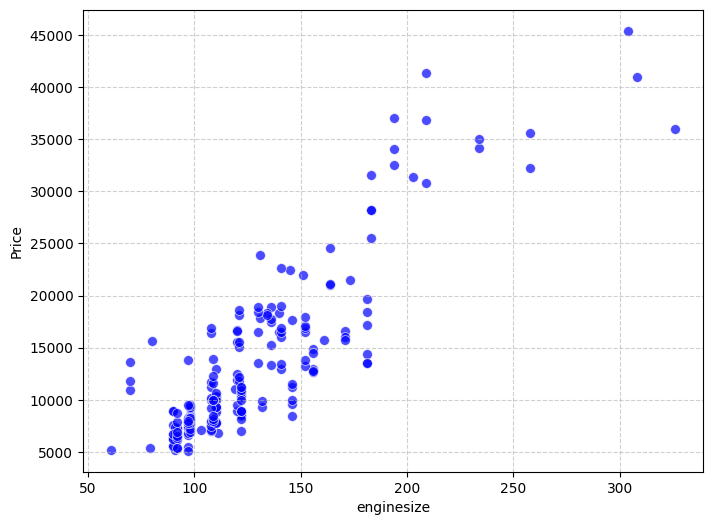

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

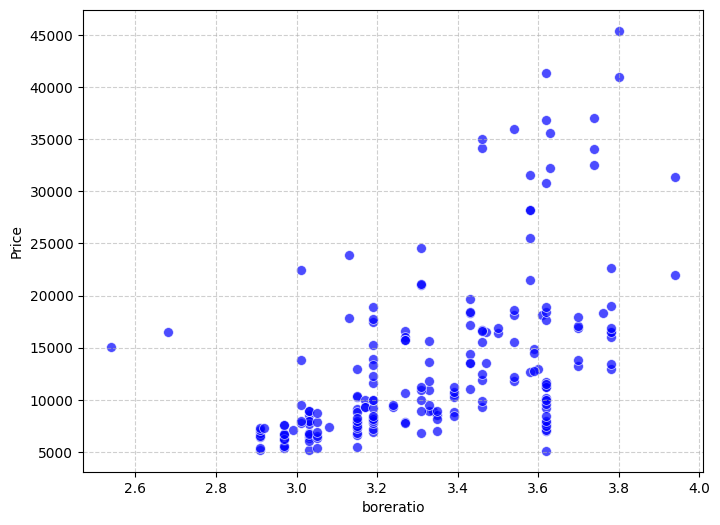

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

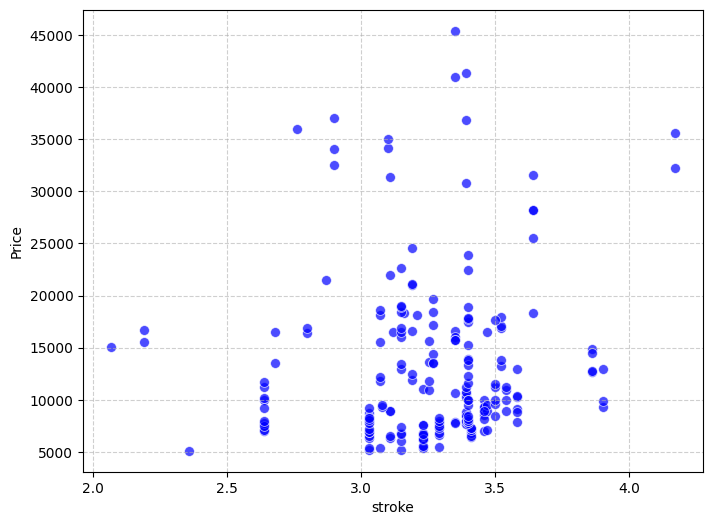

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

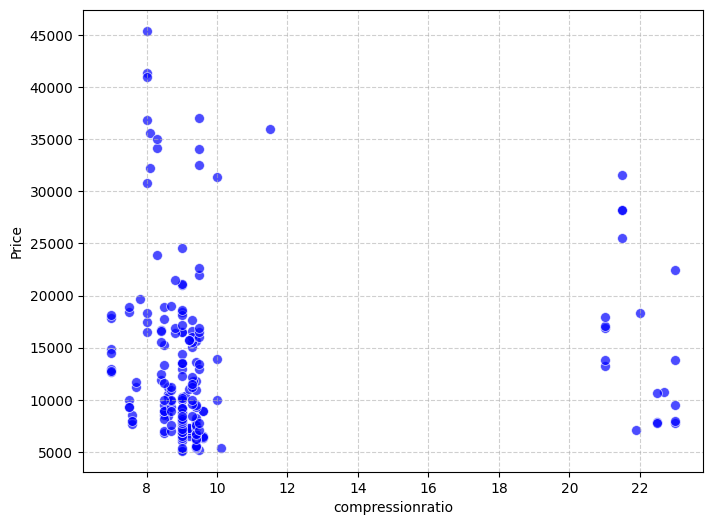

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

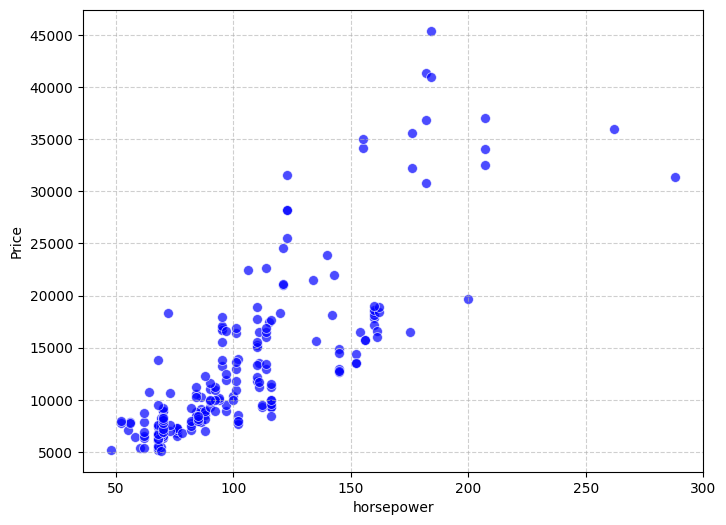

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

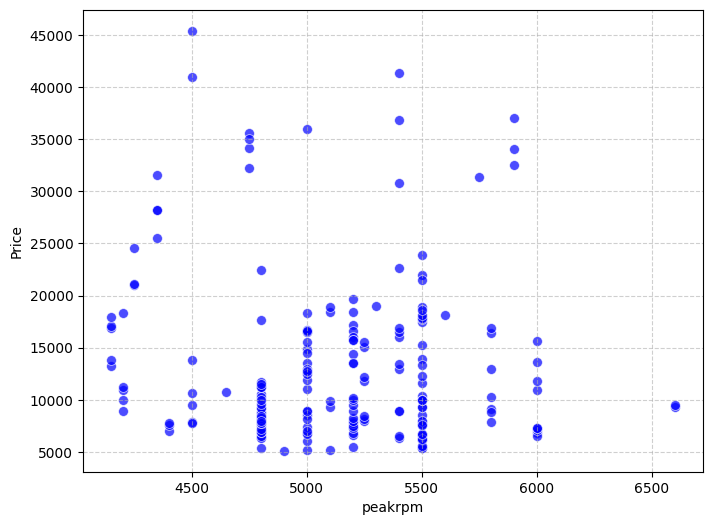

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

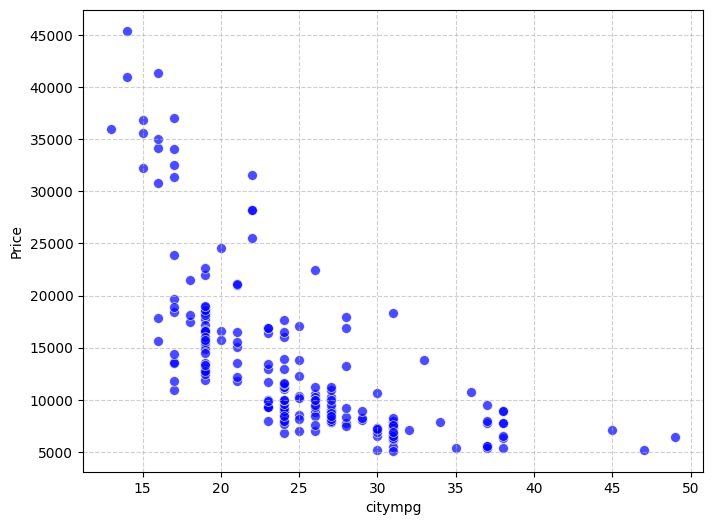

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

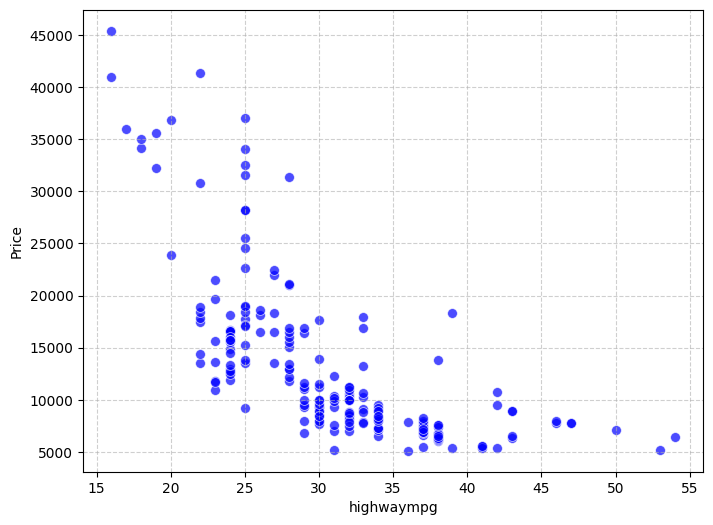

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

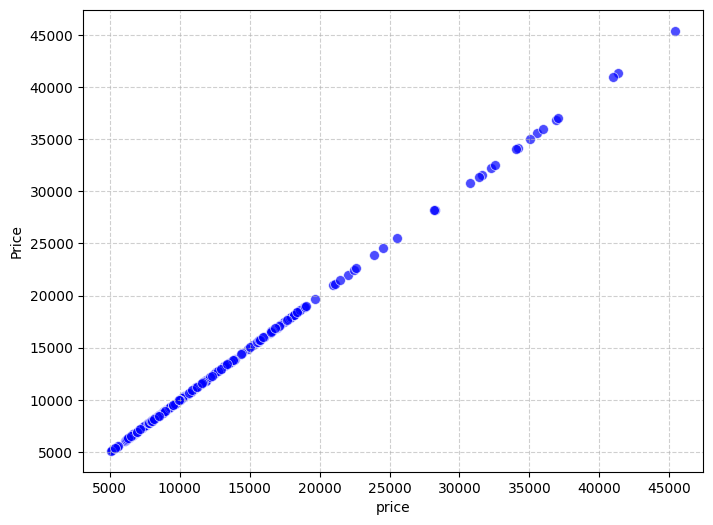

In \[35\]:

    categ_col = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']
    label_encoders = {}
    for i in categ_col:
        le = LabelEncoder()
        cdata[i] = le.fit_transform(cdata[i])
        label_encoders[i] = le

In \[38\]:

    for i in categ_col:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=i, y='price', data=cdata, palette='Set3')
        
        plt.grid(axis='y', linestyle='--', alpha=0.6)
                 
        plt.xlabel(i)
        plt.ylabel('Price')
        plt.title(f'Box plot of {i} vs. price')
                 
        plt.xticks(rotation=45)
        plt.show()

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

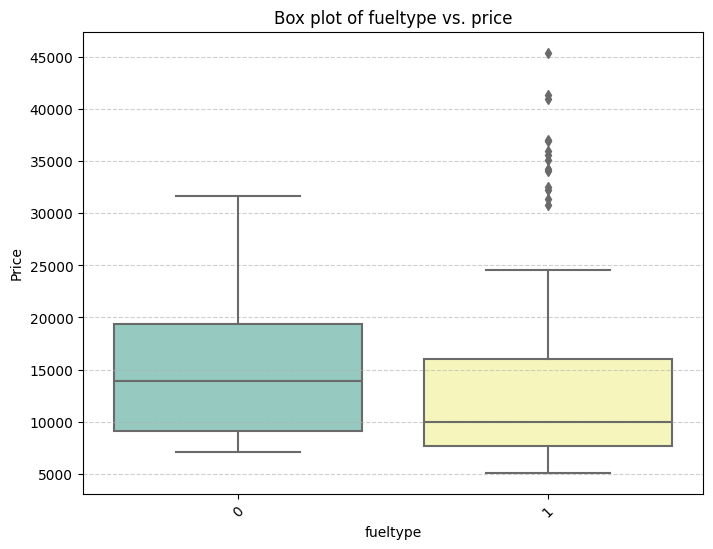

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

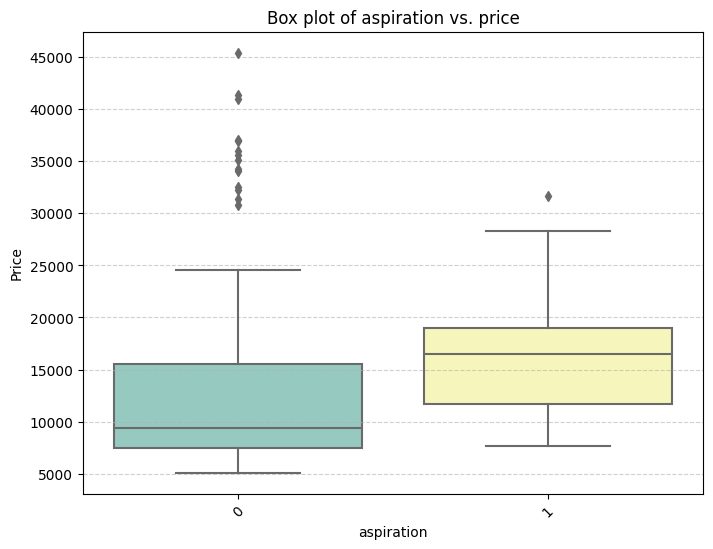

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

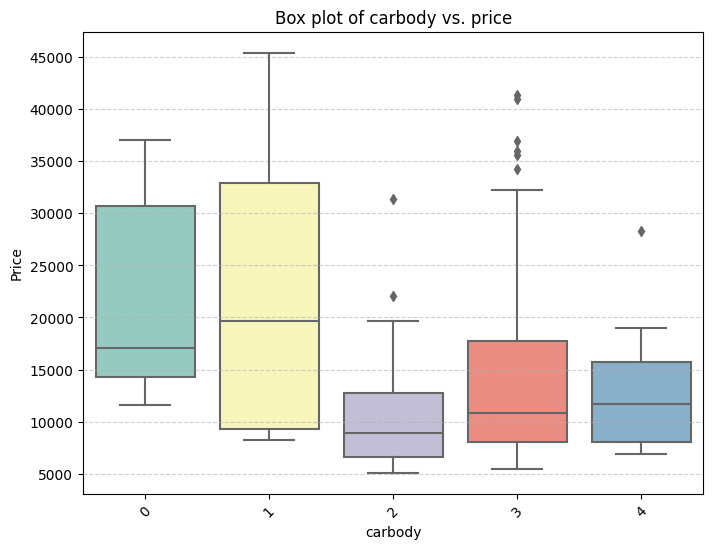

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

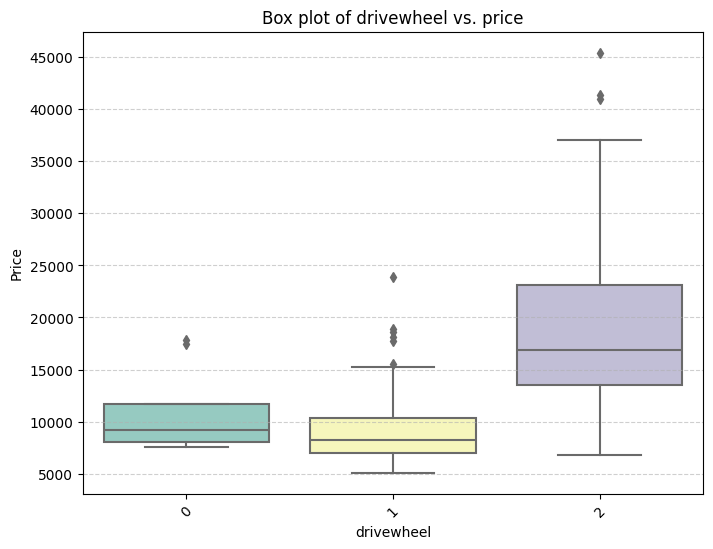

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

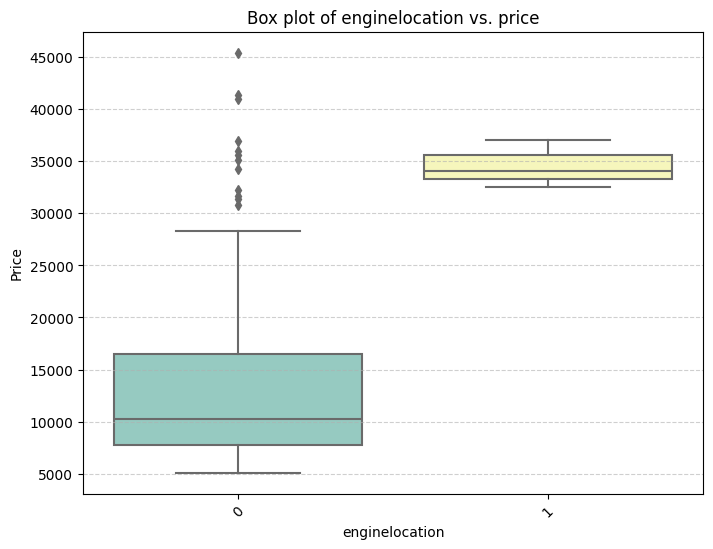

    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):
    C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
      if pd.api.types.is_categorical_dtype(vector):

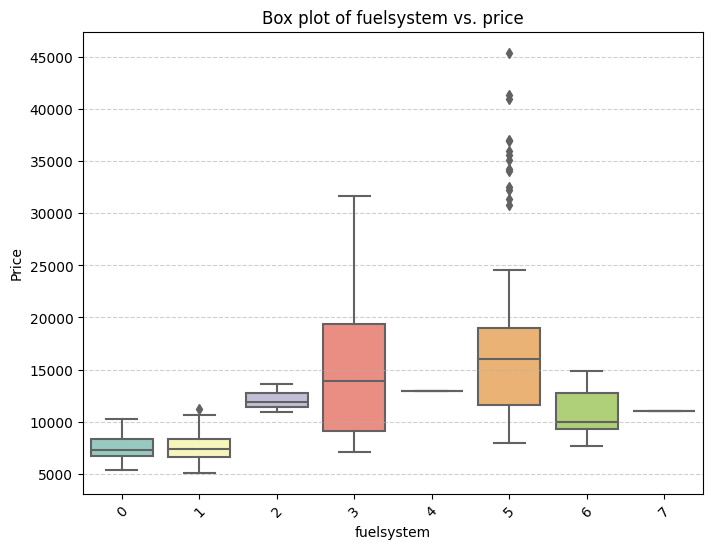

In \[43\]:

    # delete un nessry columns
    cdata = cdata.drop(['symboling','doornumber', 'carheight', 'stroke', 'compressionratio', 'peakrpm'], axis = 1)

In \[44\]:

    # find the outlir's and remove the outlairs
    Q1 = cdata['price'].quantile(0.25)
    Q3 = cdata['price'].quantile(0.75)
    IQR = Q3 - Q1
    cdata = cdata[cdata['price'] <= Q3 + 1.5 * IQR]
    cdata = cdata[cdata['price'] >= Q1 - 1.5 * IQR]

In \[45\]:

    cdata

Out\[45\]:

|     | CarName                  | fueltype | aspiration | carbody | drivewheel | enginelocation | wheelbase | carlength | carwidth | curbweight | enginetype | cylindernumber | enginesize | fuelsystem | boreratio | horsepower | citympg | highwaympg | price   |
|-----|--------------------------|----------|------------|---------|------------|----------------|-----------|-----------|----------|------------|------------|----------------|------------|------------|-----------|------------|---------|------------|---------|
| 0   | alfa-romero giulia       | 1        | 0          | 0       | 2          | 0              | 88.6      | 168.8     | 64.1     | 2548       | dohc       | 4              | 130        | 5          | 3.47      | 111        | 21      | 27         | 13495.0 |
| 1   | alfa-romero stelvio      | 1        | 0          | 0       | 2          | 0              | 88.6      | 168.8     | 64.1     | 2548       | dohc       | 4              | 130        | 5          | 3.47      | 111        | 21      | 27         | 16500.0 |
| 2   | alfa-romero Quadrifoglio | 1        | 0          | 2       | 2          | 0              | 94.5      | 171.2     | 65.5     | 2823       | ohcv       | 6              | 152        | 5          | 2.68      | 154        | 19      | 26         | 16500.0 |
| 3   | audi 100 ls              | 1        | 0          | 3       | 1          | 0              | 99.8      | 176.6     | 66.2     | 2337       | ohc        | 4              | 109        | 5          | 3.19      | 102        | 24      | 30         | 13950.0 |
| 4   | audi 100ls               | 1        | 0          | 3       | 0          | 0              | 99.4      | 176.6     | 66.4     | 2824       | ohc        | 5              | 136        | 5          | 3.19      | 115        | 18      | 22         | 17450.0 |
| ... | ...                      | ...      | ...        | ...     | ...        | ...            | ...       | ...       | ...      | ...        | ...        | ...            | ...        | ...        | ...       | ...        | ...     | ...        | ...     |
| 200 | volvo 145e (sw)          | 1        | 0          | 3       | 2          | 0              | 109.1     | 188.8     | 68.9     | 2952       | ohc        | 4              | 141        | 5          | 3.78      | 114        | 23      | 28         | 16845.0 |
| 201 | volvo 144ea              | 1        | 1          | 3       | 2          | 0              | 109.1     | 188.8     | 68.8     | 3049       | ohc        | 4              | 141        | 5          | 3.78      | 160        | 19      | 25         | 19045.0 |
| 202 | volvo 244dl              | 1        | 0          | 3       | 2          | 0              | 109.1     | 188.8     | 68.9     | 3012       | ohcv       | 6              | 173        | 5          | 3.58      | 134        | 18      | 23         | 21485.0 |
| 203 | volvo 246                | 0        | 1          | 3       | 2          | 0              | 109.1     | 188.8     | 68.9     | 3217       | ohc        | 6              | 145        | 3          | 3.01      | 106        | 26      | 27         | 22470.0 |
| 204 | volvo 264gl              | 1        | 1          | 3       | 2          | 0              | 109.1     | 188.8     | 68.9     | 3062       | ohc        | 4              | 141        | 5          | 3.78      | 114        | 19      | 25         | 22625.0 |

188 rows × 19 columns

In \[105\]:

    x = cdata.drop('price', axis=1)
    y = cdata['price']

In \[106\]:

    y

Out\[106\]:

    0      13495.0
    1      16500.0
    2      16500.0
    3      13950.0
    4      17450.0
            ...   
    200    16845.0
    201    19045.0
    202    21485.0
    203    22470.0
    204    22625.0
    Name: price, Length: 188, dtype: float64

In \[107\]:

    x

Out\[107\]:

|     | CarName                  | fueltype | aspiration | carbody | drivewheel | enginelocation | wheelbase | carlength | carwidth | curbweight | enginetype | cylindernumber | enginesize | fuelsystem | boreratio | horsepower | citympg | highwaympg |
|-----|--------------------------|----------|------------|---------|------------|----------------|-----------|-----------|----------|------------|------------|----------------|------------|------------|-----------|------------|---------|------------|
| 0   | alfa-romero giulia       | 1        | 0          | 0       | 2          | 0              | 88.6      | 168.8     | 64.1     | 2548       | dohc       | 4              | 130        | 5          | 3.47      | 111        | 21      | 27         |
| 1   | alfa-romero stelvio      | 1        | 0          | 0       | 2          | 0              | 88.6      | 168.8     | 64.1     | 2548       | dohc       | 4              | 130        | 5          | 3.47      | 111        | 21      | 27         |
| 2   | alfa-romero Quadrifoglio | 1        | 0          | 2       | 2          | 0              | 94.5      | 171.2     | 65.5     | 2823       | ohcv       | 6              | 152        | 5          | 2.68      | 154        | 19      | 26         |
| 3   | audi 100 ls              | 1        | 0          | 3       | 1          | 0              | 99.8      | 176.6     | 66.2     | 2337       | ohc        | 4              | 109        | 5          | 3.19      | 102        | 24      | 30         |
| 4   | audi 100 ls              | 1        | 0          | 3       | 0          | 0              | 99.4      | 176.6     | 66.4     | 2824       | ohc        | 5              | 136        | 5          | 3.19      | 115        | 18      | 22         |
| ... | ...                      | ...      | ...        | ...     | ...        | ...            | ...       | ...       | ...      | ...        | ...        | ...            | ...        | ...        | ...       | ...        | ...     | ...        |
| 200 | volvo 145e (sw)          | 1        | 0          | 3       | 2          | 0              | 109.1     | 188.8     | 68.9     | 2952       | ohc        | 4              | 141        | 5          | 3.78      | 114        | 23      | 28         |
| 201 | volvo 144ea              | 1        | 1          | 3       | 2          | 0              | 109.1     | 188.8     | 68.8     | 3049       | ohc        | 4              | 141        | 5          | 3.78      | 160        | 19      | 25         |
| 202 | volvo 244dl              | 1        | 0          | 3       | 2          | 0              | 109.1     | 188.8     | 68.9     | 3012       | ohcv       | 6              | 173        | 5          | 3.58      | 134        | 18      | 23         |
| 203 | volvo 246                | 0        | 1          | 3       | 2          | 0              | 109.1     | 188.8     | 68.9     | 3217       | ohc        | 6              | 145        | 3          | 3.01      | 106        | 26      | 27         |
| 204 | volvo 264gl              | 1        | 1          | 3       | 2          | 0              | 109.1     | 188.8     | 68.9     | 3062       | ohc        | 4              | 141        | 5          | 3.78      | 114        | 19      | 25         |

188 rows × 18 columns

In \[93\]:

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In \[110\]:

    # Define column transformation
    onehot = OneHotEncoder()
    onehot.fit(x[['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']])

Out\[110\]:

    OneHotEncoder()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

OneHotEncoder

    OneHotEncoder()

In \[111\]:

    col_transformer = make_column_transformer(
        (OneHotEncoder(categories=onehot.categories_), ['CarName', 'fueltype', 'aspiration', 'carbody', 
            'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']),remainder='passthrough'
    )

In \[112\]:

    # Linear Regression
    Lr = LinearRegression()
    pipeline = Pipeline(steps=[
        ('col_transformer', col_transformer),
        ('Lr', Lr)
    ])

In \[113\]:

    pipeline.fit(x_train, y_train)
    y_predict = pipeline.predict(x_test)
    r2_linear_regression = r2_score(y_test, y_predict)

### best models<a href="#best-models" class="anchor-link">¶</a>

In \[114\]:

    regressor_models = {
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'Linear Regression': LinearRegression(),
        'SVR': SVR()
    }

### R-squared score<a href="#R-squared-score" class="anchor-link">¶</a>

In \[131\]:

    for model_name, model in regressor_models.items():
        pipeline = Pipeline(steps=[
            ('col_transformer', col_transformer),
            ('regressor', model)
        ])
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        print(f'{model_name}: R^2 Score = {r2}')

    Decision Tree: R^2 Score = 0.6980200649833634
    Random Forest: R^2 Score = 0.8435665422335574
    AdaBoost: R^2 Score = 0.8356230375451044
    Linear Regression: R^2 Score = 0.39708907732855725
    SVR: R^2 Score = -0.15541300051962903

### Root Mean Squared Error<a href="#Root-Mean-Squared-Error" class="anchor-link">¶</a>

In \[134\]:

    for model_name, model in regressor_models.items():
        pipeline = Pipeline(steps=[
            ('col_transformer', col_transformer),
            ('regressor', model)
        ])
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        print(f'{model_name}: Root Mean Squared Error = {rmse}')
        

    Decision Tree: Root Mean Squared Error = 2366.0542115333906
    Random Forest: Root Mean Squared Error = 1896.4259473669586
    AdaBoost: Root Mean Squared Error = 1893.824294796345
    Linear Regression: Root Mean Squared Error = 3552.6563879893597
    SVR: Root Mean Squared Error = 4918.07620349703

### Cross-Validation<a href="#Cross-Validation" class="anchor-link">¶</a>

In \[135\]:

    for model_name, model in regressor_models.items():
        pipeline = Pipeline(steps=[
            ('col_transformer', col_transformer),
            ('regressor', model)
        ])
        scores = cross_val_score(pipeline, x, y, cv=5)
        mean_score = np.mean(scores)
        print(f'{model_name}: Cross-Validation Score = {mean_score}')

    Decision Tree: Cross-Validation Score = 0.47626907895953474
    Random Forest: Cross-Validation Score = 0.6849335052587213
    AdaBoost: Cross-Validation Score = 0.6948998444782821
    Linear Regression: Cross-Validation Score = -0.10870157095597147
    SVR: Cross-Validation Score = -0.30335128461227445

### Mean Absolute Error<a href="#Mean-Absolute-Error" class="anchor-link">¶</a>

In \[137\]:

    for model_name, model in regressor_models.items():
        pipeline = Pipeline(steps=[
            ('col_transformer', col_transformer),
            ('regressor', model)])
        pipeline.fit(x_train, y_train)  
        y_pred = pipeline.predict(x_test)
        mae = mean_absolute_error(y_test, y_pred)
        print(f'{model_name}: Mean Absolute Error = {mae}')

    Decision Tree: Mean Absolute Error = 1732.0
    Random Forest: Mean Absolute Error = 1344.0265589361709
    AdaBoost: Mean Absolute Error = 1444.9119566424486
    Linear Regression: Mean Absolute Error = 2820.849850696666
    SVR: Mean Absolute Error = 3905.896465218836

In \[148\]:

    cat = CatBoostRegressor(verbose=0)
    model = Pipeline(steps=[
        ('col_transformer', col_transformer),
        ('cat', cat) ])  
    model.fit(x_train, y_train)

Out\[148\]:

    Pipeline(steps=[('col_transformer',
                     ColumnTransformer(remainder='passthrough',
                                       transformers=[('onehotencoder',
                                                      OneHotEncoder(categories=[array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
           'alfa-romero stelvio', 'audi 100 ls', 'audi 4000', 'audi 5000',
           'audi 5000s (diesel)', 'audi fox', 'bmw 320i', 'bmw x1', 'bmw x3',
           'bmw z4', 'buick electra 225 custom', 'chevr...
                                                                                array([0, 1, 2, 3, 4], dtype=int64),
                                                                                array([0, 1, 2], dtype=int64),
                                                                                array([0], dtype=int64),
                                                                                array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
                                                                                array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)]),
                                                      ['CarName', 'fueltype',
                                                       'aspiration', 'carbody',
                                                       'drivewheel',
                                                       'enginelocation',
                                                       'enginetype',
                                                       'fuelsystem'])])),
                    ('cat',
                     <catboost.core.CatBoostRegressor object at 0x000001EA7E0D9E10>)])

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

Pipeline

    Pipeline(steps=[('col_transformer',
                     ColumnTransformer(remainder='passthrough',
                                       transformers=[('onehotencoder',
                                                      OneHotEncoder(categories=[array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
           'alfa-romero stelvio', 'audi 100 ls', 'audi 4000', 'audi 5000',
           'audi 5000s (diesel)', 'audi fox', 'bmw 320i', 'bmw x1', 'bmw x3',
           'bmw z4', 'buick electra 225 custom', 'chevr...
                                                                                array([0, 1, 2, 3, 4], dtype=int64),
                                                                                array([0, 1, 2], dtype=int64),
                                                                                array([0], dtype=int64),
                                                                                array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
                                                                                array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)]),
                                                      ['CarName', 'fueltype',
                                                       'aspiration', 'carbody',
                                                       'drivewheel',
                                                       'enginelocation',
                                                       'enginetype',
                                                       'fuelsystem'])])),
                    ('cat',
                     <catboost.core.CatBoostRegressor object at 0x000001EA7E0D9E10>)])

col_transformer: ColumnTransformer

    ColumnTransformer(remainder='passthrough',
                      transformers=[('onehotencoder',
                                     OneHotEncoder(categories=[array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
           'alfa-romero stelvio', 'audi 100 ls', 'audi 4000', 'audi 5000',
           'audi 5000s (diesel)', 'audi fox', 'bmw 320i', 'bmw x1', 'bmw x3',
           'bmw z4', 'buick electra 225 custom', 'chevrolet impala',
           'chevrolet monte carlo', '...
           'volvo 264gl', 'volvo diesel', 'vw dasher', 'vw rabbit'],
          dtype=object),
                                                               array([0, 1], dtype=int64),
                                                               array([0, 1], dtype=int64),
                                                               array([0, 1, 2, 3, 4], dtype=int64),
                                                               array([0, 1, 2], dtype=int64),
                                                               array([0], dtype=int64),
                                                               array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
                                                               array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)]),
                                     ['CarName', 'fueltype', 'aspiration',
                                      'carbody', 'drivewheel', 'enginelocation',
                                      'enginetype', 'fuelsystem'])])

onehotencoder

    ['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

OneHotEncoder

    OneHotEncoder(categories=[array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
           'alfa-romero stelvio', 'audi 100 ls', 'audi 4000', 'audi 5000',
           'audi 5000s (diesel)', 'audi fox', 'bmw 320i', 'bmw x1', 'bmw x3',
           'bmw z4', 'buick electra 225 custom', 'chevrolet impala',
           'chevrolet monte carlo', 'chevrolet vega 2300',
           'dodge challenger se', 'dodge colt (sw)', 'dodge colt hardtop'...
           'volkswagen super beetle', 'volkswagen type 3', 'volvo 144ea',
           'volvo 145e (sw)', 'volvo 244dl', 'volvo 245', 'volvo 246',
           'volvo 264gl', 'volvo diesel', 'vw dasher', 'vw rabbit'],
          dtype=object),
                              array([0, 1], dtype=int64),
                              array([0, 1], dtype=int64),
                              array([0, 1, 2, 3, 4], dtype=int64),
                              array([0, 1, 2], dtype=int64),
                              array([0], dtype=int64),
                              array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
                              array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)])

remainder

    ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']

passthrough

    passthrough

CatBoostRegressor

    <catboost.core.CatBoostRegressor object at 0x000001EA7E0D9E10>

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]: